In [1]:
!pip install neuralforecast datasets openmeteo-requests pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.2/263.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.2/683.2 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install neuralforecast openmeteo-requests requests-cache retry-requests pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 7.8 MB/s eta 0:00:00


In [3]:
import requests
import pandas as pd
import numpy as np

params_weather = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["pressure_msl", "wind_speed_10m", "wind_direction_10m"]
}
url_weather = "https://archive-api.open-meteo.com/v1/archive"
response_weather = requests.get(url_weather, params=params_weather).json()

df_weather = pd.DataFrame({
    'date': pd.to_datetime(response_weather['hourly']['time']),
    'pressure': response_weather['hourly']['pressure_msl'],
    'wind_speed': response_weather['hourly']['wind_speed_10m'],
    'wind_dir': response_weather['hourly']['wind_direction_10m']
})

df_weather['wind_sin'] = np.sin(np.deg2rad(df_weather['wind_dir']))
df_weather['wind_cos'] = np.cos(np.deg2rad(df_weather['wind_dir']))

params_marine = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["wave_height"]
}
url_marine = "https://marine-api.open-meteo.com/v1/marine"
response_marine = requests.get(url_marine, params=params_marine).json()

df_marine = pd.DataFrame({
    'date': pd.to_datetime(response_marine['hourly']['time']),
    'y': response_marine['hourly']['wave_height']
})

df = pd.merge(df_weather, df_marine, on="date")
df = df.rename(columns={'date': 'ds'})
df['unique_id'] = 'NorthSea_Point1'
df = df.dropna()

print("data processing completed successfully. Now we have wind vectors sin/cos")

data processing completed successfully. Now we have wind vectors sin/cos


# NHITS

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


training with huber loss best of both worlds


┏━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name         ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ loss         │ HuberLoss     │      0 │ train │     0 │
│ 1 │ padder_train │ ConstantPad1d │      0 │ train │     0 │
│ 2 │ scaler       │ TemporalNorm  │      0 │ train │     0 │
│ 3 │ blocks       │ ModuleList    │  3.0 M │ train │     0 │
└───┴──────────────┴───────────────┴────────┴───────┴───────┘

Trainable params: 3.0 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 3.0 M                                                                                                
Total estimated model params size (MB): 12                                                                         
Modules in train mode: 34                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=4000` reached.


/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:378: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:434: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

mae: 0.325 m


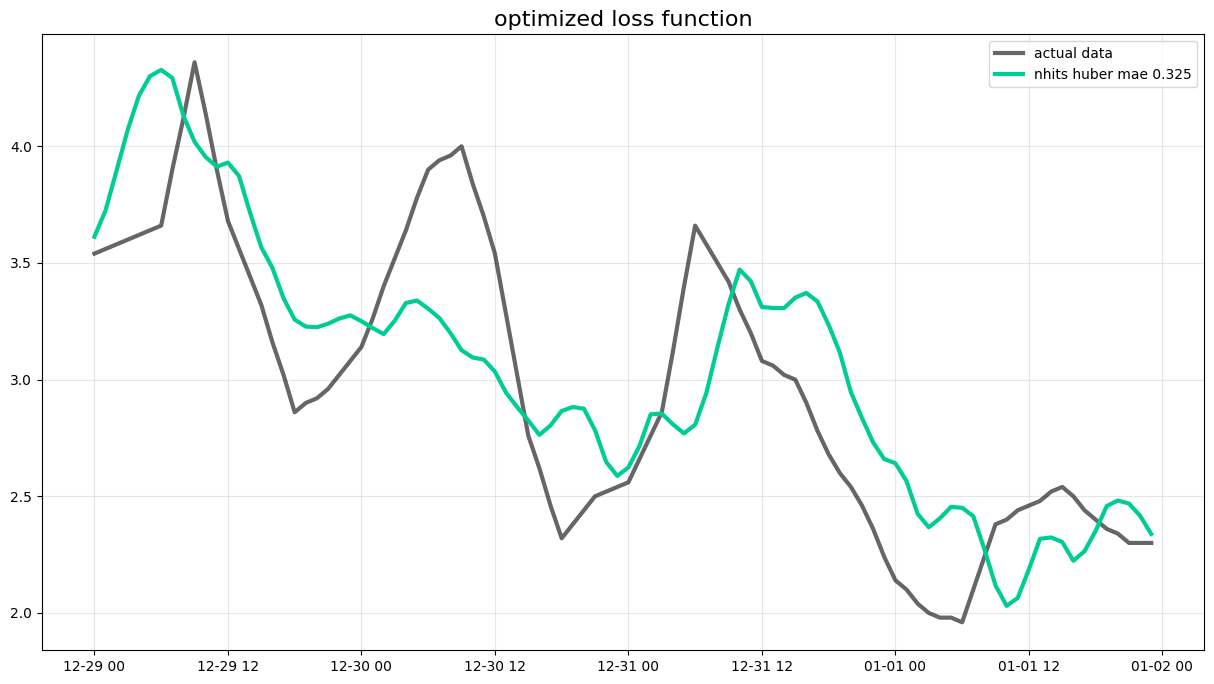

In [11]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS
from neuralforecast.losses.pytorch import HuberLoss

url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["pressure_msl", "wind_speed_10m"]
}
resp_w = requests.get(url_weather, params=params_weather).json()
df_weather = pd.DataFrame({
    'ds': pd.to_datetime(resp_w['hourly']['time']),
    'pressure': resp_w['hourly']['pressure_msl'],
    'wind_speed': resp_w['hourly']['wind_speed_10m']
})

url_marine = "https://marine-api.open-meteo.com/v1/marine"
params_marine = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["wave_height"]
}
resp_m = requests.get(url_marine, params=params_marine).json()
df_marine = pd.DataFrame({
    'ds': pd.to_datetime(resp_m['hourly']['time']),
    'y': resp_m['hourly']['wave_height']
})

df = pd.merge(df_weather, df_marine, on="ds")
df['unique_id'] = 'NorthSea_Point1'

df['wind_rolling'] = df['wind_speed'].rolling(window=3).mean().fillna(df['wind_speed'])
df = df.dropna()
horizon = 96
Y_train = df[:-horizon]
Y_test = df[-horizon:]
input_size = 48
models = [
    NHITS(h=horizon,
          input_size=input_size,
          loss=HuberLoss(),
          futr_exog_list=['pressure', 'wind_speed', 'wind_rolling'],
          max_steps=4000,
          scaler_type='robust',
          alias='NHITS_Huber')
]

nf = NeuralForecast(models=models, freq='H')
nf.fit(df=Y_train)
future_exog = Y_test[['unique_id', 'ds', 'pressure', 'wind_speed', 'wind_rolling']]
Y_hat = nf.predict(futr_df=future_exog)
final_df = pd.merge(Y_test, Y_hat, on=['ds', 'unique_id'], how='left')
mae_huber = abs(final_df['y'] - final_df['NHITS_Huber']).mean()
print(f"mae: {mae_huber:.3f} m")
plt.figure(figsize=(15, 8))
plt.plot(final_df['ds'], final_df['y'], label='actual data', color='black', linewidth=3, alpha=0.6)
plt.plot(final_df['ds'], final_df['NHITS_Huber'], label=f'nhits huber mae {mae_huber:.3f}', color='#00CC96', linewidth=3)
plt.title('optimized loss function', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

restoring reliable base settings


INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┓
┃   ┃ Name         ┃ Type          ┃ Params ┃ Mode  ┃ FLOPs ┃
┡━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━┩
│ 0 │ loss         │ MAE           │      0 │ train │     0 │
│ 1 │ padder_train │ ConstantPad1d │      0 │ train │     0 │
│ 2 │ scaler       │ TemporalNorm  │      0 │ train │     0 │
│ 3 │ blocks       │ ModuleList    │  2.9 M │ train │     0 │
└───┴──────────────┴───────────────┴────────┴───────┴───────┘

Trainable params: 2.9 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 2.9 M                                                                                                
Total estimated model params size (MB): 11                                                                         
Modules in train mode: 34                                                                                          
Modules in eval mode: 0                                                                                            
Total FLOPs: 0

Output()

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=2000` reached.


/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:378: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.12/dist-packages/utilsforecast/processing.py:434: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Output()

mae : 0.377 m


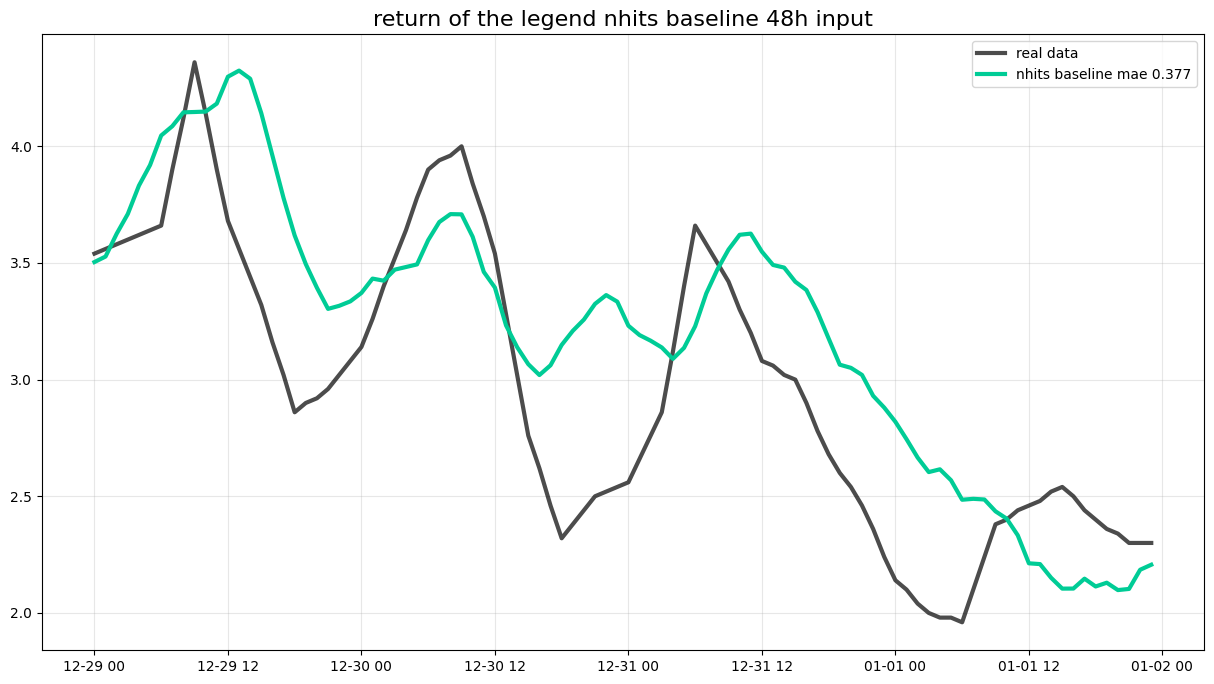

In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS
from neuralforecast.losses.pytorch import MAE

print("restoring reliable base settings")

url_weather = "https://archive-api.open-meteo.com/v1/archive"
params_weather = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["pressure_msl", "wind_speed_10m"]
}
resp_w = requests.get(url_weather, params=params_weather).json()
df_weather = pd.DataFrame({
    'ds': pd.to_datetime(resp_w['hourly']['time']),
    'pressure': resp_w['hourly']['pressure_msl'],
    'wind_speed': resp_w['hourly']['wind_speed_10m']
})

url_marine = "https://marine-api.open-meteo.com/v1/marine"
params_marine = {
    "latitude": 56.0, "longitude": 3.0,
    "start_date": "2023-01-01", "end_date": "2024-01-01",
    "hourly": ["wave_height"]
}
resp_m = requests.get(url_marine, params=params_marine).json()
df_marine = pd.DataFrame({
    'ds': pd.to_datetime(resp_m['hourly']['time']),
    'y': resp_m['hourly']['wave_height']
})

df = pd.merge(df_weather, df_marine, on="ds")
df['unique_id'] = 'NorthSea_Point1'
df = df.dropna()

horizon = 96
Y_train = df[:-horizon]
Y_test = df[-horizon:]

models = [
    NHITS(h=horizon,
          input_size=48,
          loss=MAE(),
          futr_exog_list=['pressure', 'wind_speed'],
          max_steps=2000,
          scaler_type='robust',
          random_seed=42,
          alias='NHITS_Baseline')
]

nf = NeuralForecast(models=models, freq='H')
nf.fit(df=Y_train)
future_exog = Y_test[['unique_id', 'ds', 'pressure', 'wind_speed']]
Y_hat = nf.predict(futr_df=future_exog)
final_df = pd.merge(Y_test, Y_hat, on=['ds', 'unique_id'], how='left')
mae_final = abs(final_df['y'] - final_df['NHITS_Baseline']).mean()
print(f"mae : {mae_final:.3f} m")
plt.figure(figsize=(15, 8))
plt.plot(final_df['ds'], final_df['y'], label='real data', color='black', linewidth=3, alpha=0.7)
plt.plot(final_df['ds'], final_df['NHITS_Baseline'], label=f'nhits baseline mae {mae_final:.3f}', color='#00CC96', linewidth=3)
plt.title('return of the legend nhits baseline 48h input', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Ми використали тут ансамбль, щоб аби зменшити "випадковість" нейронки, і додали змінну кінетичної енергії вітру, аби стабілізувати прогноз